# ДЗ: Деревья решений

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X.shape

(1797, 64)

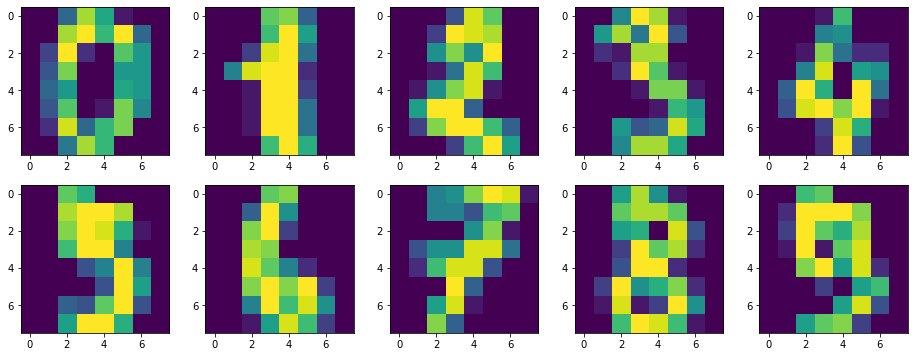

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

### train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Обучение модели

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
pred_train = model.predict(X_train)
pred_train

array([6, 0, 0, ..., 2, 7, 1])

In [9]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,6,6
1,0,0
2,0,0
3,3,3
4,0,0
...,...,...
1432,3,3
1433,7,7
1434,2,2
1435,7,7


## Валидация

In [10]:
pred_test = model.predict(
    X_test
)

In [11]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
...,...,...
355,4,4
356,3,3
357,8,8
358,9,3


In [12]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 1.0
Accuracy модели на тестовой выборке 0.8416666666666667


## Снижение переобучения

In [13]:
model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={
    'min_samples_leaf': range(20), 'max_depth': range(20), 'max_leaf_nodes': [10**i for i in (2, 3, 4)]})
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(0, 20),
                         'max_leaf_nodes': [100, 1000, 10000],
                         'min_samples_leaf': range(0, 20)})

In [14]:
model.best_params_

{'max_depth': 11, 'max_leaf_nodes': 1000, 'min_samples_leaf': 1}

In [15]:
pred_train = model.predict(X_train)
pred_train

array([6, 0, 0, ..., 2, 7, 1])

In [16]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,6,6
1,0,0
2,0,0
3,3,3
4,0,0
...,...,...
1432,3,3
1433,7,7
1434,2,2
1435,7,7


## Валидация

In [17]:
pred_test = model.predict(
    X_test
)

In [18]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
...,...,...
355,4,4
356,3,3
357,8,8
358,9,3


In [19]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.9832985386221295
Accuracy модели на тестовой выборке 0.8583333333333333
